In [ ]:
import torch
import matplotlib.pyplot as plt

from gnn.src.data.dataset import InMemoQM9Dataset
from gnn.src.train.trainer import Trainer

from gnn.src.nn.schnet import SchNet
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from gnn.src.data.utils import get_property

In [ ]:
dataset = InMemoQM9Dataset('./records')

In [ ]:
trainer = Trainer(
    dataset=dataset,
    device='cuda',
    validation_split = 0.1,
    shuffle_dataset = True,
    dataset_size=len(dataset)
)

In [ ]:
model=SchNet(n_interactions=3, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean, losses_val_mean = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=100,
    models_dir='./models',
    checkpoint_frequency=10,
    property='ϵHOMO',
    map_property=lambda t: get_property(t, "ϵHOMO"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

### loss

<details>
  <summary>losses_train_mean</summary>
  [0.0009502430172957178, 0.00036838083311905396, 0.0003314042033459707, 0.0002992480562322558, 0.0002741251657275776, 0.0002612479376845874, 0.0002507772326961252, 0.00024379715574374995, 0.0002365811448209167, 0.00022996437332679969, 0.00022250319607405893, 0.00021782714205055787, 0.0002127566352949409, 0.00020840957144127695, 0.00020333179808547472, 0.00019916541863073778, 0.00019537104644083014, 0.00019083818448327965, 0.0001874292051979769, 0.00018430281548126263, 0.00017954316281694108, 0.00017749600576724058, 0.00017492143934594328, 0.00017289401760466506, 0.00017151622702295466, 0.0001697895788843257, 0.00016825646073053454, 0.00016721774309497322, 0.000165726583875598, 0.00016411498027536043, 0.0001616004335012559, 0.00015977513656341218, 0.0001591795426122877, 0.00015798242630705696, 0.00015671026283891592, 0.0001555875710636017, 0.00015473399437416975, 0.0001537616880234557, 0.00015245199169511056, 0.00015139822932358588, 0.00014918158707900585, 0.0001482789175319779, 0.00014717489548986019, 0.00014664537362749433, 0.0001456368505224834, 0.0001446309756930033, 0.0001439899678155764, 0.00014336643787690235, 0.0001424013503959577, 0.00014151459358065127, 0.00013972874087103158, 0.00013896303533190537, 0.00013838880725891009, 0.00013763669689423962, 0.00013692237329615437, 0.00013648814279214214, 0.00013575656484410398, 0.0001354188585277734, 0.00013476112209929683, 0.0001342798940902078, 0.00013290563001596933, 0.00013217831047766535, 0.00013189476294899385, 0.0001313784409604558, 0.0001310005259337273, 0.00013051309201987023, 0.00013021480131099593, 0.00012969538278501412, 0.00012932409042167606, 0.00012888027784320078, 0.00012781054628670157, 0.0001274292644311449, 0.00012710507637139448, 0.0001266376782100037, 0.00012623298312595298, 0.0001257156964741415, 0.00012549708860588315, 0.0001251984037077245, 0.0001249309921825989, 0.0001246449445432213, 0.00012324423870758256, 0.00012319732057566396, 0.00012274052699019801, 0.00012228276694058329, 0.0001223168255123012, 0.00012194054289381146, 0.00012145274336867921, 0.00012132435404856689, 0.00012080687762564054, 0.00012059954393253663, 0.0001196958108213646, 0.00011938684797416332, 0.00011909437738062173, 0.00011874235745638351, 0.00011851584775521713, 0.000118277897449953, 0.00011815792659456567, 0.00011789386692846253, 0.00011755622172719434, 0.00011753029372538766]
</details>


<details>
  <summary>losses_val_mean</summary>
  [0.0004519382867988782, 0.0003105306319406854, 0.0004588482643358369, 0.00034178215617834695, 0.00025039220822182335, 0.00023550169533859545, 0.0002469027485734003, 0.00021897573977061434, 0.00024474784512485017, 0.00023640947123722899, 0.00020356352286983722, 0.00019628934098112936, 0.0002150958783947959, 0.0002286154023877673, 0.00018803849696803396, 0.000195319829067612, 0.00021352046713321766, 0.00018570172765178776, 0.00017613242287384284, 0.00016910640922746998, 0.00016294430085402064, 0.00016303572096072248, 0.00016716159509403406, 0.00015799175774009554, 0.00017843779363847917, 0.00016329735608319835, 0.00015480636464236015, 0.00016039538003870417, 0.00015401165717865775, 0.00015907830505420943, 0.00014877910744806152, 0.0001476525510850913, 0.00016734947074769615, 0.00016845233737300554, 0.00018035705156836622, 0.00016768387193471956, 0.0001463137771348635, 0.00014986139311502146, 0.00015909989793743695, 0.00015436128069245986, 0.0001479826349869171, 0.00014114885755154007, 0.0001516008596825112, 0.00015342473055756034, 0.00014030191060184172, 0.0001381562283378684, 0.00013589604106663847, 0.00013877389469355022, 0.000137076315897479, 0.00013945874450860295, 0.00013615167709195614, 0.00013384872797127183, 0.00013573380094191546, 0.00013494578843468777, 0.00014073368569786086, 0.00013780814594117996, 0.00013351615668309906, 0.00015667313044780552, 0.00013064987993424435, 0.00013159725911783784, 0.00015741480527601837, 0.00013137460262452734, 0.0001276947894584137, 0.00012927573485304597, 0.0001319775413017695, 0.00012612582444970912, 0.0001261042814234278, 0.0001272019677963405, 0.00012905626769183705, 0.00013004800064474008, 0.00012447290696100493, 0.00013974557454703753, 0.00013197691421680774, 0.00013358571948788025, 0.0001228153559843973, 0.0001247680272477416, 0.000130780157572427, 0.00012305744159454173, 0.00012397677436251655, 0.00012274464121083507, 0.0001245483923105145, 0.00012272365339150562, 0.0001229714314454635, 0.00013599074956263215, 0.00012054406956833809, 0.00013013986232353854, 0.00011898669976732826, 0.00011852050380995024, 0.00012115711412814414, 0.00011929784816543958, 0.00011759383190625827, 0.00011815556721137331, 0.00011852451934130062, 0.00011808173933569812, 0.00011912740160334535, 0.00012120800855040574, 0.00011936777808736987, 0.00012976351459289214, 0.00012966739020568786, 0.00012079950726584942]
</details>

In [ ]:
losses_train_mean_MSE_Ha = [0.0009502430172957178, 0.00036838083311905396, 0.0003314042033459707, 0.0002992480562322558, 0.0002741251657275776, 0.0002612479376845874, 0.0002507772326961252, 0.00024379715574374995, 0.0002365811448209167, 0.00022996437332679969, 0.00022250319607405893, 0.00021782714205055787, 0.0002127566352949409, 0.00020840957144127695, 0.00020333179808547472, 0.00019916541863073778, 0.00019537104644083014, 0.00019083818448327965, 0.0001874292051979769, 0.00018430281548126263, 0.00017954316281694108, 0.00017749600576724058, 0.00017492143934594328, 0.00017289401760466506, 0.00017151622702295466, 0.0001697895788843257, 0.00016825646073053454, 0.00016721774309497322, 0.000165726583875598, 0.00016411498027536043, 0.0001616004335012559, 0.00015977513656341218, 0.0001591795426122877, 0.00015798242630705696, 0.00015671026283891592, 0.0001555875710636017, 0.00015473399437416975, 0.0001537616880234557, 0.00015245199169511056, 0.00015139822932358588, 0.00014918158707900585, 0.0001482789175319779, 0.00014717489548986019, 0.00014664537362749433, 0.0001456368505224834, 0.0001446309756930033, 0.0001439899678155764, 0.00014336643787690235, 0.0001424013503959577, 0.00014151459358065127, 0.00013972874087103158, 0.00013896303533190537, 0.00013838880725891009, 0.00013763669689423962, 0.00013692237329615437, 0.00013648814279214214, 0.00013575656484410398, 0.0001354188585277734, 0.00013476112209929683, 0.0001342798940902078, 0.00013290563001596933, 0.00013217831047766535, 0.00013189476294899385, 0.0001313784409604558, 0.0001310005259337273, 0.00013051309201987023, 0.00013021480131099593, 0.00012969538278501412, 0.00012932409042167606, 0.00012888027784320078, 0.00012781054628670157, 0.0001274292644311449, 0.00012710507637139448, 0.0001266376782100037, 0.00012623298312595298, 0.0001257156964741415, 0.00012549708860588315, 0.0001251984037077245, 0.0001249309921825989, 0.0001246449445432213, 0.00012324423870758256, 0.00012319732057566396, 0.00012274052699019801, 0.00012228276694058329, 0.0001223168255123012, 0.00012194054289381146, 0.00012145274336867921, 0.00012132435404856689, 0.00012080687762564054, 0.00012059954393253663, 0.0001196958108213646, 0.00011938684797416332, 0.00011909437738062173, 0.00011874235745638351, 0.00011851584775521713, 0.000118277897449953, 0.00011815792659456567, 0.00011789386692846253, 0.00011755622172719434, 0.00011753029372538766]
losses_val_mean_MSE_Ha = [0.0004519382867988782, 0.0003105306319406854, 0.0004588482643358369, 0.00034178215617834695, 0.00025039220822182335, 0.00023550169533859545, 0.0002469027485734003, 0.00021897573977061434, 0.00024474784512485017, 0.00023640947123722899, 0.00020356352286983722, 0.00019628934098112936, 0.0002150958783947959, 0.0002286154023877673, 0.00018803849696803396, 0.000195319829067612, 0.00021352046713321766, 0.00018570172765178776, 0.00017613242287384284, 0.00016910640922746998, 0.00016294430085402064, 0.00016303572096072248, 0.00016716159509403406, 0.00015799175774009554, 0.00017843779363847917, 0.00016329735608319835, 0.00015480636464236015, 0.00016039538003870417, 0.00015401165717865775, 0.00015907830505420943, 0.00014877910744806152, 0.0001476525510850913, 0.00016734947074769615, 0.00016845233737300554, 0.00018035705156836622, 0.00016768387193471956, 0.0001463137771348635, 0.00014986139311502146, 0.00015909989793743695, 0.00015436128069245986, 0.0001479826349869171, 0.00014114885755154007, 0.0001516008596825112, 0.00015342473055756034, 0.00014030191060184172, 0.0001381562283378684, 0.00013589604106663847, 0.00013877389469355022, 0.000137076315897479, 0.00013945874450860295, 0.00013615167709195614, 0.00013384872797127183, 0.00013573380094191546, 0.00013494578843468777, 0.00014073368569786086, 0.00013780814594117996, 0.00013351615668309906, 0.00015667313044780552, 0.00013064987993424435, 0.00013159725911783784, 0.00015741480527601837, 0.00013137460262452734, 0.0001276947894584137, 0.00012927573485304597, 0.0001319775413017695, 0.00012612582444970912, 0.0001261042814234278, 0.0001272019677963405, 0.00012905626769183705, 0.00013004800064474008, 0.00012447290696100493, 0.00013974557454703753, 0.00013197691421680774, 0.00013358571948788025, 0.0001228153559843973, 0.0001247680272477416, 0.000130780157572427, 0.00012305744159454173, 0.00012397677436251655, 0.00012274464121083507, 0.0001245483923105145, 0.00012272365339150562, 0.0001229714314454635, 0.00013599074956263215, 0.00012054406956833809, 0.00013013986232353854, 0.00011898669976732826, 0.00011852050380995024, 0.00012115711412814414, 0.00011929784816543958, 0.00011759383190625827, 0.00011815556721137331, 0.00011852451934130062, 0.00011808173933569812, 0.00011912740160334535, 0.00012120800855040574, 0.00011936777808736987, 0.00012976351459289214, 0.00012966739020568786, 0.00012079950726584942]

losses_train_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_train_mean_MSE_Ha))
losses_val_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_val_mean_MSE_Ha))

fig, axs = plt.subplots(nrows=2)
plt.tight_layout()
axs[0].plot(range(100), losses_train_mean_RMSE_eV, c='g')
axs[0].plot(range(100), losses_val_mean_RMSE_eV, c='b')
axs[0].legend (('Обучение', 'Валидация'))
axs[0].set(xlabel='Число эпох', ylabel='RMSE ϵHOMO, эВ')
axs[1].plot(range(10, 100), losses_train_mean_RMSE_eV[10:100], c='g')
axs[1].plot(range(10, 100), losses_val_mean_RMSE_eV[10:100], c='b')
axs[1].legend (('Обучение', 'Валидация'))
axs[1].set(xlabel='Число эпох', ylabel='RMSE ϵHOMO, эВ')
print(losses_val_mean_RMSE_eV[-1])
plt.show()

0.05733196833097363

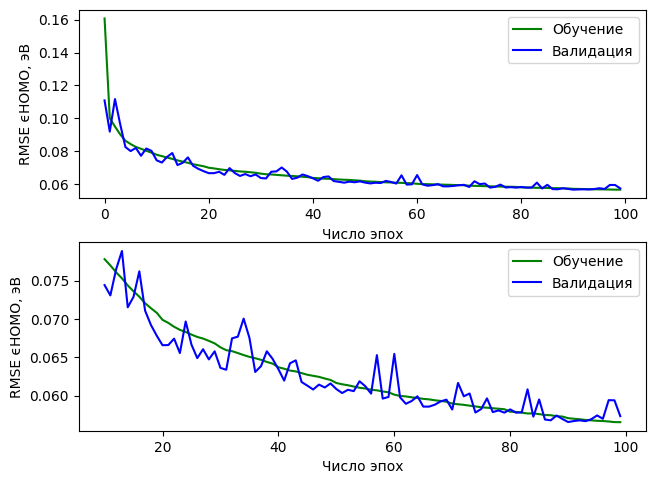